## Testing machine learning

# Loading data

SUCCESS


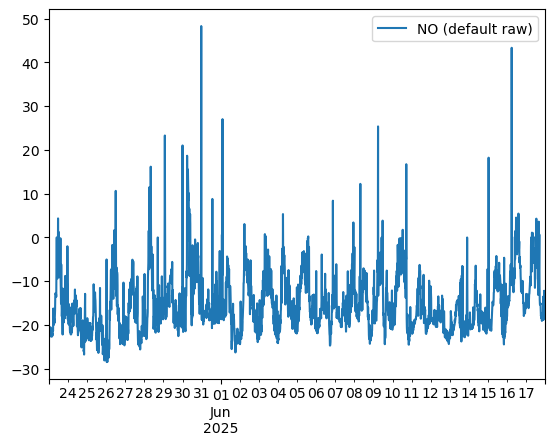

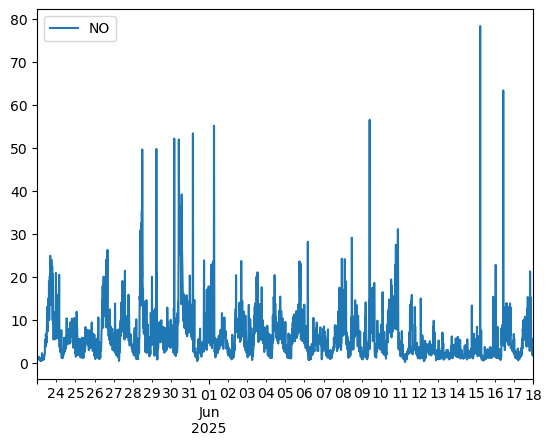

In [88]:
import API_tools
from datetime import datetime
import pandas as pd
import load_data
import utils_new
import matplotlib.pyplot as plt

end_name = "sb_dh1t"
start=datetime(2025,5,23)
end=datetime(2025,6,19)

raw_data=pd.DataFrame(API_tools.get_raw_gas_data(end_name,'NO',start,end))

ref_file = "data/refdata/svea_test3"
ref_data, ref_desc = load_data.load_slb_data(ref_file)

raw_data, ref_data = utils_new.align_and_resample(raw_data, ref_data)

raw_data = raw_data[["NO (default raw)"]]
ref_data = ref_data[["NO"]]

raw_data.plot()
ref_data.plot()
plt.show()

In [89]:
print(raw_data)
print(ref_data.head(-1))

                     NO (default raw)
2025-05-23 00:15:00        -22.532007
2025-05-23 00:30:00        -22.390494
2025-05-23 00:45:00        -22.491866
2025-05-23 01:00:00        -22.288973
2025-05-23 01:15:00        -22.234677
...                               ...
2025-06-17 22:45:00        -17.374908
2025-06-17 23:00:00        -16.342804
2025-06-17 23:15:00        -13.399442
2025-06-17 23:30:00        -16.479783
2025-06-17 23:45:00        -15.380382

[2495 rows x 1 columns]
                           NO
2025-05-23 00:15:00  1.197245
2025-05-23 00:30:00  1.425381
2025-05-23 00:45:00  1.177311
2025-05-23 01:00:00  1.248571
2025-05-23 01:15:00  1.507326
...                       ...
2025-06-17 22:45:00  1.839914
2025-06-17 23:00:00  3.088711
2025-06-17 23:15:00  3.083519
2025-06-17 23:30:00  1.778725
2025-06-17 23:45:00  4.394157

[2495 rows x 1 columns]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(raw_data, ref_data.head(-1), test_size=0.2)

y_test.sort_index()
timestamps=y_test.index

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

df1=pd.DataFrame({'NO':y_pred},index=([timestamps]))
df2=y_test
df1=df1.sort_index()

c:\Users\turev\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [148]:
y_test=y_test.sort_index()
df1=df1.sort_index()

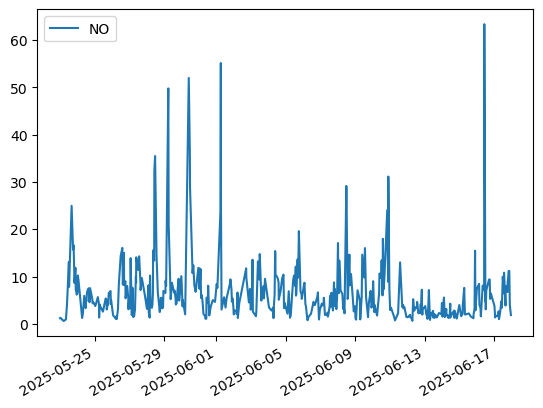

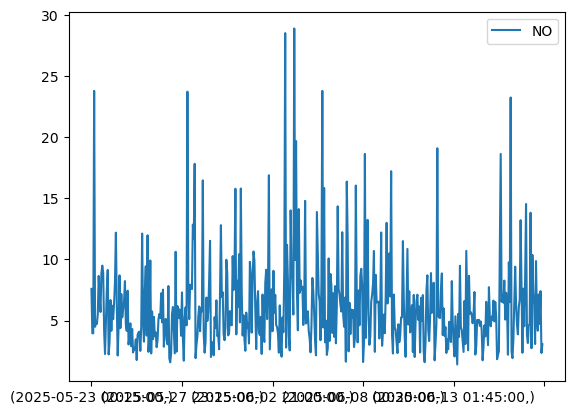

In [153]:
y_test.plot()
df1.plot()
plt.show()